# Notebook 38: Tectono-sedimentary model

In notebooks 34 to 37, we added growth strata in a very simplistic way, just by filling up to the top the available accomodation space. Also, we couldn't have the subsidence rate lower than the uplift rate (G < 1.0), thus effectively eroding the pre-growth strata.

In this notebook, we will use a mathematical formulation for the modelling of growth strata associated with fault-related fold structures ([Hardy et al., 1996](https://www.lyellcollection.org/doi/abs/10.1144/gsl.sp.1996.099.01.20)). This formulation allows modelling background sedimentation and local erosion, transport and deposition as a result of fold growth. The mathematical model is very elegant and it just boils down to this equation:

$$
\partial h / \partial t=[p-\partial F / \partial x]+[v-u . \partial h / \partial x]\quad\quad(1)
$$

where:

- $h$ is the height of the ground surface
- $t$ is time
- $p$ is a source term
- $F$ is the sediment flux
- $x$ is the horizontal coordinate (increasing to the right)
- $v$ is the vertical velocity (uplift positive)
- $u$ is the horizontal velocity (left to right positive and vice versa)

This equation combines sedimentary (first term in Eq. 1) and tectonic (second term in Eq. 1) processes in an Eulerian coordinate system, that is a **fixed** coordinate system which does not move as a result of tectonic deformation ([Hardy et al., 1996](https://www.lyellcollection.org/doi/abs/10.1144/gsl.sp.1996.099.01.20)).

To model the evolving sediment geometries a base level must be defined, this is the datum below which sediments can be deposited. A background, constant sedimentation rate $p$ is also introduced: sediments will be deposited everywhere across the model at the rate $p$, except where the fold is uplifted above the specified base level. 

In addition to the background sedimentation, the evolving fold will generate a structural high which may lead to local erosion and sedimentation. To simulate this, we can use the diffusion equation in which the sediment flux, $F$, is assumed to be proportional to the slope of the ground surface and directed down the slope:

$$
\mathrm{F}=-\alpha\; \partial h / \partial x \quad\quad(2)
$$

where $\alpha$ is the diffusion coefficient. Equation 1 thus becomes:

$$
\partial h / \partial t=[p+\alpha\;\partial^2 h / \partial x^2]+[v-u . \partial h / \partial x]\quad\quad(3)
$$

## Python function:

The function [trishear_sed](../functions/trishear_sed.py) plots the tectonic and sedimentary evolution of a 2D trishear fault propagation fold. It considers background sedimentation and local erosion, transport and deposition as a result of trishear folding (Eq. 3 above).

## Application:

Let's run the cases in ([Hardy et al., 1996](https://www.lyellcollection.org/doi/abs/10.1144/gsl.sp.1996.099.01.20)), for thrust related trishear fold. Let's start with fill to the top sedimentation, where the base level rise and background sedimentation rate are the same:

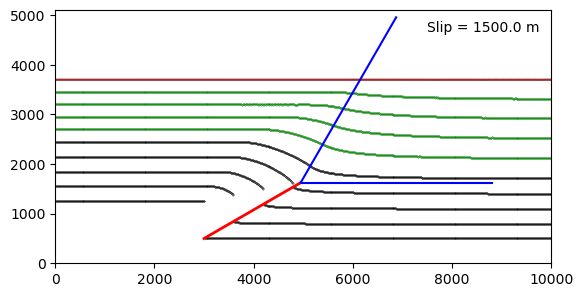

In [1]:
import numpy as np

# import our function
import sys, os
sys.path.append(os.path.abspath(os.path.join("..", "functions")))
from trishear_sed import trishear_sed

# define the input parameters
# beds datums (m)
yp = [500, 800, 1100, 1400, 1700] 
# extent of section (m) and number of points
p_sect = [10_000, 1000] 
# trishear parameters
# x and y of fault tip (m), ramp angle, P/S,
# trishear angle, and concentration factor
p_tri = [3000, 500, 30*np.pi/180, 1.5, 60*np.pi/180, 1.0]
# tectono-sedimentary parameters:
# time per increment: 1.0 ka (careful, a larger value -> numerical instability)
# total run time: 1.0 Ma 
# base level rise: 2.0 m/ka
# background sedimentation rate: 2.0 m/ka 
# slip increment: 1.5 m/ka
# time interval at which growth layers are added: 200 ka
sed = [1.0, 1.0, 2.0, 2.0, 1.5, 200]
# diffusion coefficient m^2/a
diffusion = 3.0

# plot the trishear fold
trishear_sed(yp, p_sect, p_tri, sed, diffusion)

The ground surface is the brown line, the growth strata the green lines, and the pre-growth strata the black lines. The base level is shown by a thin gray line, but it does not show here because in this case it coincides with the ground surface.

There are two things to notice: The first one is that the layers, and in particular the growth strata, show oscilations. This is because of instabilities in the numerical derivatives. The second one is that the hanging wall strata is not shown in places where the sequence is repeated. This is because at every $x$ there is only one elevation $h$ (Eq. 3). It could be possible to fix this, but I prefer to leave the code as it is. After all, our focus is on the growth strata.

Let's run now the second case: base level rise greater than sedimentation rate. This prevents the growth strata from filling all of the available accommodation space, and it results in the sediments draping the structure:

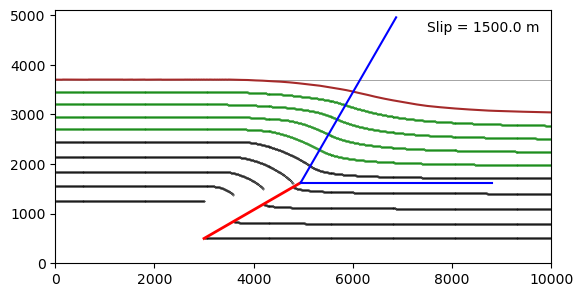

In [2]:
# tectono-sedimentary parameters:
# time per increment: 1.0 ka
# total run time: 1.0 Ma 
# base level rise: 2.0 m/ka
# background sedimentation rate: 1.3 m/ka 
# slip increment: 1.5 m/ka
# time interval at which growth layers are added: 200 ka
sed = [2.0, 1.0, 2.0, 1.3, 1.5, 200]

# plot the trishear fold
trishear_sed(yp, p_sect, p_tri, sed, diffusion)

Now let's try a low background sedimentation rate. In this case the effect of fold growth on sedimentation is more clearly seen:

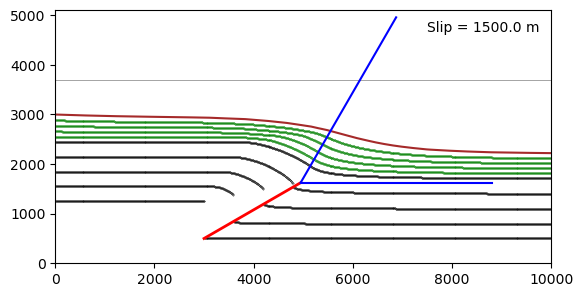

In [3]:
# tectono-sedimentary parameters:
# time per increment: 1.0 ka
# total run time: 1.0 Ma 
# base level rise: 2.0 m/ka
# background sedimentation rate: 0.5 m/ka 
# slip increment: 1.5 m/ka
# time interval at which growth layers are added: 200 ka
sed = [2.0, 1.0, 2.0, 0.5, 1.5, 200]

# plot the trishear fold
trishear_sed(yp, p_sect, p_tri, sed, diffusion)

And finally, let's model a fold in a sub-aerial setting. In this case both, the background sedimentation rate and the base level rise, are zero:

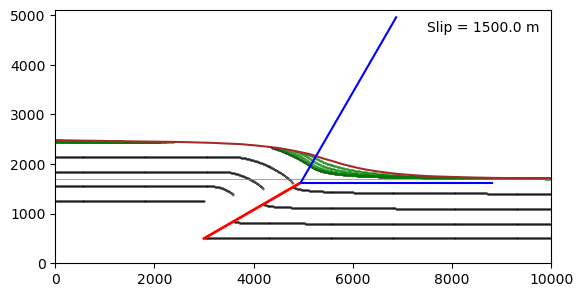

In [4]:
# tectono-sedimentary parameters:
# time per increment: 1.0 ka
# total run time: 1.0 Ma 
# base level rise: 0.0 m/ka
# background sedimentation rate: 0.0 m/ka 
# slip increment: 1.5 m/ka
# time interval at which growth layers are added: 200 ka
sed = [2.0, 1.0, 0.0, 0.0, 1.5, 200]

# plot the trishear fold
trishear_sed(yp, p_sect, p_tri, sed, diffusion)

There are many ways you can experiment with this code. Try placing the initial fault tip higher. Try a higher or lower P/S. Change the dip angle of the thrust. Use a higher or lower diffusion coefficient. Try a normal fault, I am not sure that works. But anyway, we now have a good start to model tectonic deformation and sedimentation synchronously.